# Analysis of Student’s background, academics, competence & expected salary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

**Importing the data and exploratory data analysis**

In [2]:
df = pd.read_excel('Data analyst Data.xlsx')
df.head()

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


In [3]:
df = df.drop_duplicates() #Remove duplicates

df.drop_duplicates(subset='Email ID', keep='first', inplace=True)
df.isnull().sum()

First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Events                                                                0
Attendee Status                                                       0
College Name                                                         10
How did you come to know about this event?                         1082
Specify in "Others" (how did you come to know about this event)    2116
Designation                                                           0
Year of Graduation                                                    0
City                                                                  0
CGPA                                                                  0
Experience with python (Months)                                       0
Family Income                                                   

In [4]:
# Create a mask to identify rows where 'How did you come to know about this event?' is 'Others'
mask = df['How did you come to know about this event?'] == 'Others'

# Use the mask to replace the values in 'How did you come to know about this event?' with values from 'Specify in "Others"'
df.loc[mask, 'How did you come to know about this event?'] = df.loc[mask, 'Specify in "Others" (how did you come to know about this event)']

# Drop the 'Specify in "Others" (how did you come to know about this event)' column
df.drop('Specify in "Others" (how did you come to know about this event)', axis=1, inplace=True)

Now, 'How did you come to know about this event?' contains the replaced values as can be seen below:

In [5]:
df.head()

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


Lets map the income to ensure correct results

In [6]:
# Define a mapping for replacement
income_mapping = {
    '0-2 Lakh': '2',
    '2-5 Lakh': '5',
    '5-7 Lakh': '7',
    '7 Lakh+': '7'
}

# Replace values in the 'Family Income' column using the mapping
df['Family Income'] = df['Family Income'].replace(income_mapping)

In [7]:
df.isnull().sum()

First Name                                       0
Email ID                                         0
Quantity                                         0
Events                                           0
Attendee Status                                  0
College Name                                    10
How did you come to know about this event?    1134
Designation                                      0
Year of Graduation                               0
City                                             0
CGPA                                             0
Experience with python (Months)                  0
Family Income                                    0
Expected salary (Lac)                            0
Leadership- skills                               0
dtype: int64

In [8]:
df.columns

Index(['First Name', 'Email ID', 'Quantity', 'Events', 'Attendee Status',
       'College Name', 'How did you come to know about this event?',
       'Designation', 'Year of Graduation', 'City', 'CGPA',
       'Experience with python (Months)', 'Family Income',
       'Expected salary (Lac)', 'Leadership- skills'],
      dtype='object')

## Basic Questions
1. How many unique students are included in the dataset?

In [9]:
a = len(df['Email ID'].unique())
print('There are', a, 'unique students')

There are 2157 unique students


As email addresses are unique, we filtered and can see that there are 2157 unique students.

2. What is the average GPA of students?

In [10]:
AvgGPA = df['CGPA'].mean()
print('The average GPA of students is ', AvgGPA)

The average GPA of students is  8.028233657858136


3. What is the distribution of students across different graduation years?

In [11]:
print('The distrubution of students across different graduation years is: \n')
df.groupby(['Year of Graduation'])['Year of Graduation'].count()

The distrubution of students across different graduation years is: 



Year of Graduation
2023    676
2024    679
2025    565
2026    237
Name: Year of Graduation, dtype: int64

4. What is the distribution of student's experience with python programming?

In [12]:
print('The distrubution of student experience with Python programming is: \n')
df.groupby(['Experience with python (Months)'])['Experience with python (Months)'].count()

The distrubution of student experience with Python programming is: 



Experience with python (Months)
3    434
4    366
5    554
6    171
7    503
8    129
Name: Experience with python (Months), dtype: int64

5. What is the average family income of the student?

In [13]:
df['Family Income'] = pd.to_numeric(df['Family Income'], errors='coerce')

# Calculate the average family income
average_family_income = df['Family Income'].mean()

print("Average Family Income is", average_family_income)

Average Family Income is 2.2851182197496525


6. How does the GPA vary among different colleges? (Show top 5 results only)

We can see that there are high number of null values in 2 columns, lets rectify it.

In [14]:
df.dropna(subset=['College Name'], inplace=True)

In [15]:
df['College Name'] = df['College Name'].str.upper()
college_cgpa = df.groupby('College Name')['CGPA'].mean()
college_cgpa.sort_values(ascending = False).head()

College Name
NEW HORIZON INSTITUTE OF TECHNOLOGY AND MANAGEMENT                      8.336620
ST XAVIER'S COLLEGE                                                     8.323944
B. K. BIRLA COLLEGE OF ARTS, SCIENCE & COMMERCE (AUTONOMOUS), KALYAN    8.209174
DON BOSCO COLLEGE OF ENGINEERING FATORDA GOA                            8.193333
SYMBIOSIS INSTITUTE OF TECHNOLOGY, PUNE                                 8.144737
Name: CGPA, dtype: float64

7. Are there any outliers in the quantity (number of courses completed) attribute?

In [16]:
# Calculate the 25th and 75th percentiles (Q1 and Q3)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers by creating a mask
outliers = (df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)

# Count the number of outliers
num_outliers = outliers.sum()

# Print the number of outliers and optionally, the indices or rows where they occur
print("Number of Outliers:", num_outliers)

# Optionally, you can print the indices or rows of the outliers
if num_outliers > 0:
    print("Indices of Outliers:")
    print(df[outliers].index)

Number of Outliers: 0


8. What is the average GPA for student from each city?

In [17]:
average_gpa_by_city = df.groupby('City')['CGPA'].mean()
average_gpa_by_city.sort_values(ascending = False)

City
Delhi        9.014286
Raipur       8.980000
Sonipat      8.712500
konark       8.540000
Panji        8.533333
               ...   
Dhar         7.312500
Darbhanga    7.300000
New Delhi    7.142857
Daman        7.114286
Vasai        7.100000
Name: CGPA, Length: 177, dtype: float64

## Moderate Questions
10. How many students from various cities? (Solve using data visualization tool)
11. How does the expected salary vary based on factors like 'GPA', 'Family income', 'Experience with python(Month)'?
12. Which event tend to attract more students from specific fields of study?
13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?
14. How many students are graduating by the end of 2024?
15. Which promotion channel brings in more student participations for the event?
16. Find the total number of students who attended the events related to data science? (From all Data Science related courses)
17. Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg)
18. How many students know about the event from their colleges? Which of these top 5 colleges?

10. How many students from various cities? (Solve using data visualization tool)

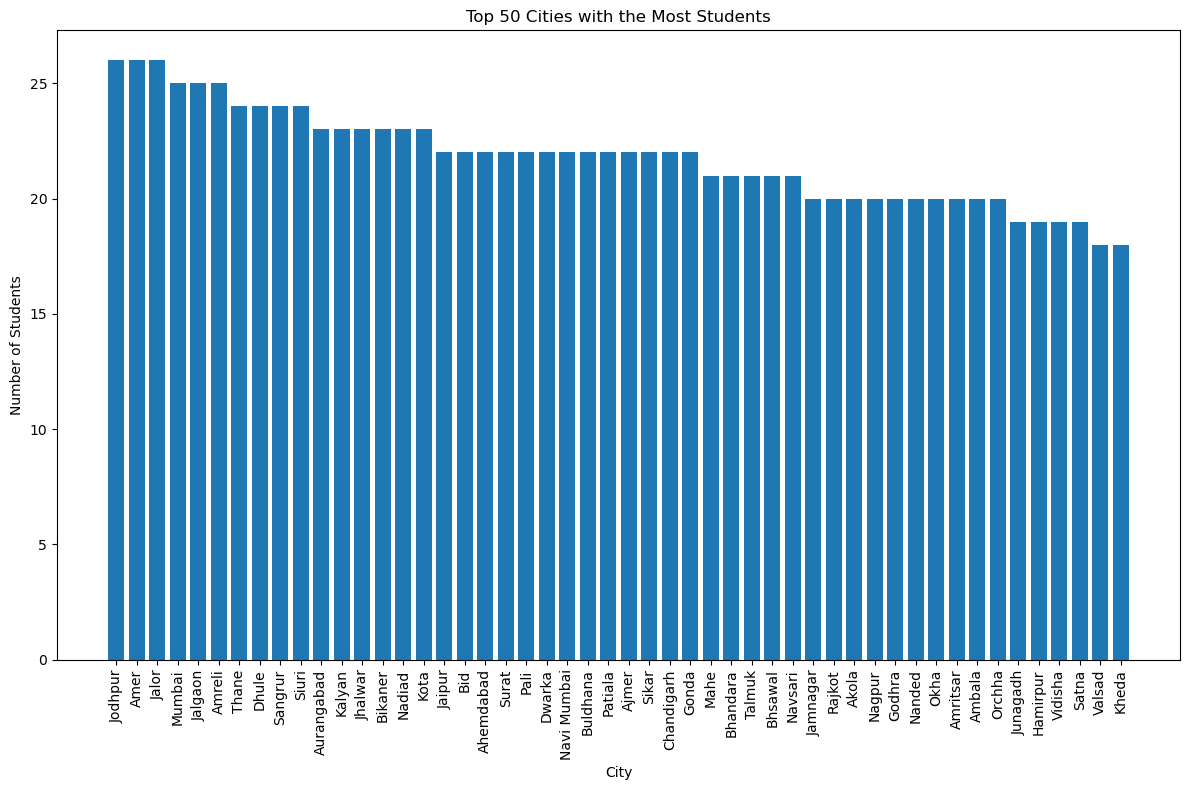

In [18]:
# Count the number of students in each city and select the top 50
top_50_cities = df['City'].value_counts().head(50)

# Create a bar chart
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
plt.bar(top_50_cities.index, top_50_cities.values)
plt.xlabel('City')
plt.ylabel('Number of Students')
plt.title('Top 50 Cities with the Most Students')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if there are many cities

# Show the plot
plt.tight_layout()
plt.show()

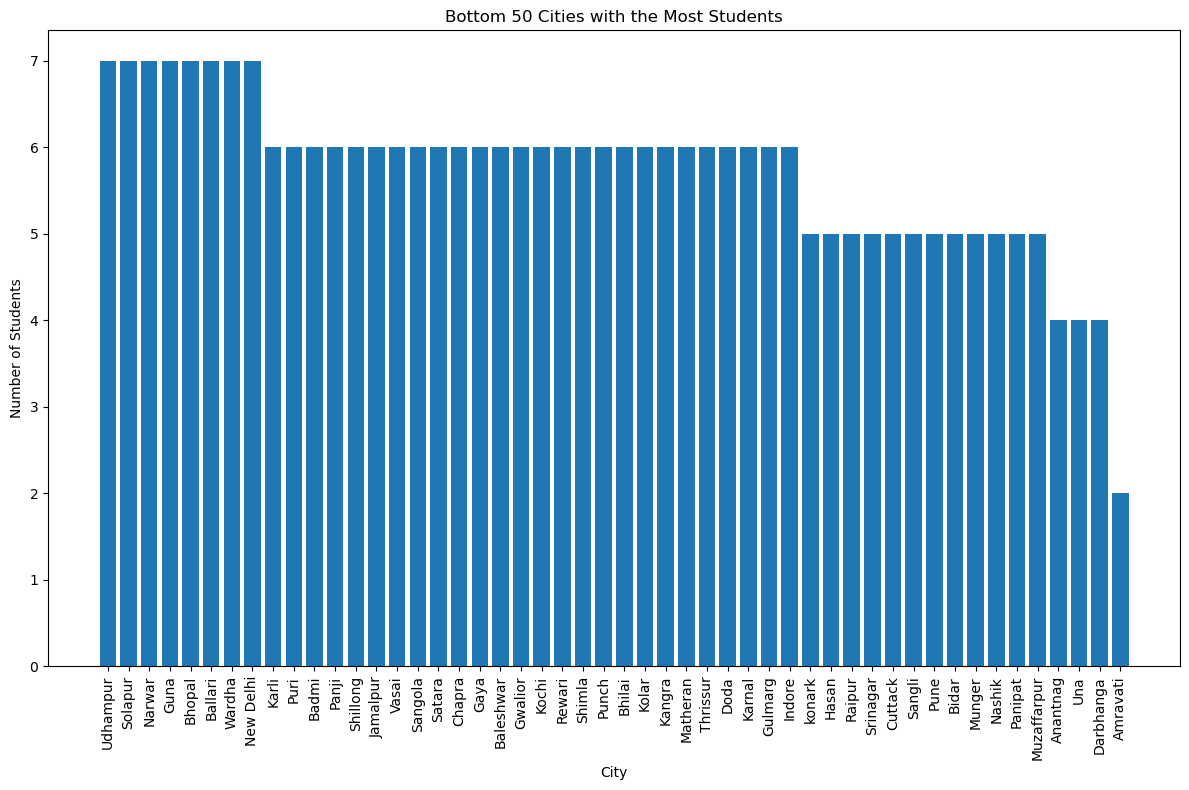

In [19]:
# Count the number of students in each city and select the top 50
bottom_50_cities = df['City'].value_counts().tail(50)

# Create a bar chart
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
plt.bar(bottom_50_cities.index, bottom_50_cities.values)
plt.xlabel('City')
plt.ylabel('Number of Students')
plt.title('Bottom 50 Cities with the Most Students')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if there are many cities

# Show the plot
plt.tight_layout()
plt.show()

Above, we have visualised only top 50 and bottom 50 cities with most and least students respectively to keep the visualization clear. We can see that highest number of students are from Jodhpur, Amer & Jalore and lowest are from Amravati.

11. How does the expected salary vary based on factors like 'GPA', 'Family income', 'Experience with python(Month)'?

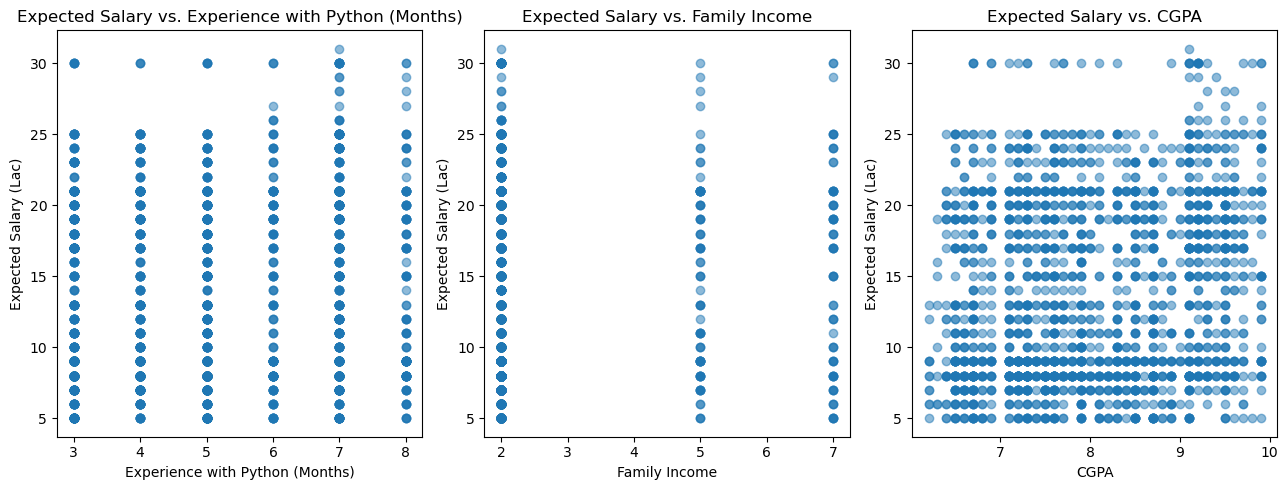

In [20]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

# Plot 1: Expected salary vs. Experience with Python
axes[0].scatter(df['Experience with python (Months)'], df['Expected salary (Lac)'], alpha=0.5)
axes[0].set_xlabel('Experience with Python (Months)')
axes[0].set_ylabel('Expected Salary (Lac)')
axes[0].set_title('Expected Salary vs. Experience with Python (Months)')

# Plot 2: Expected salary vs. Family Income
axes[1].scatter(df['Family Income'], df['Expected salary (Lac)'], alpha=0.5)
axes[1].set_xlabel('Family Income')
axes[1].set_ylabel('Expected Salary (Lac)')
axes[1].set_title('Expected Salary vs. Family Income')

# Plot 3: Expected salary vs. CGPA
axes[2].scatter(df['CGPA'], df['Expected salary (Lac)'], alpha=0.5)
axes[2].set_xlabel('CGPA')
axes[2].set_ylabel('Expected Salary (Lac)')
axes[2].set_title('Expected Salary vs. CGPA')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


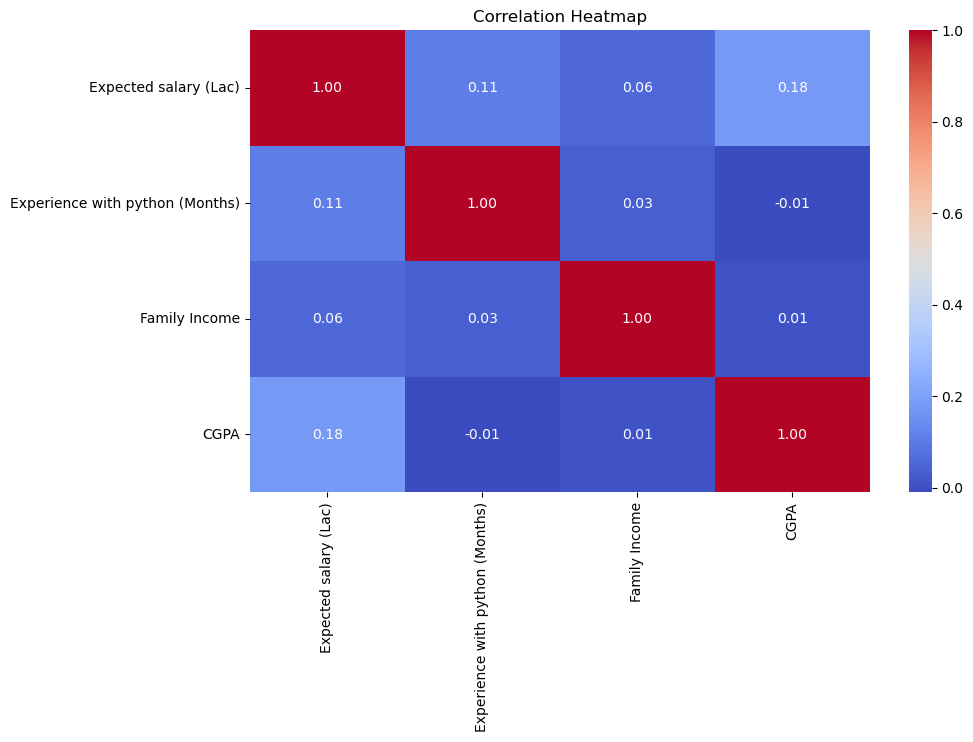

In [21]:
correlation_matrix = df[['Expected salary (Lac)', 'Experience with python (Months)', 'Family Income', 'CGPA']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

From the above correlation graph and three individual scatter plots, we can have following conclusions:
1. Family income has very less impact on Expected salary followed by Experience in Python and CGPA being highest correlated. 
2. If a student is having high CGPA, there are high chances that they have higher expectations for salary and same applies for experience with python
3. A few students with lower family income tend to have a slightly higher expected salaries.

12. Which event tend to attract more students from specific fields of study?

<Figure size 1200x800 with 0 Axes>

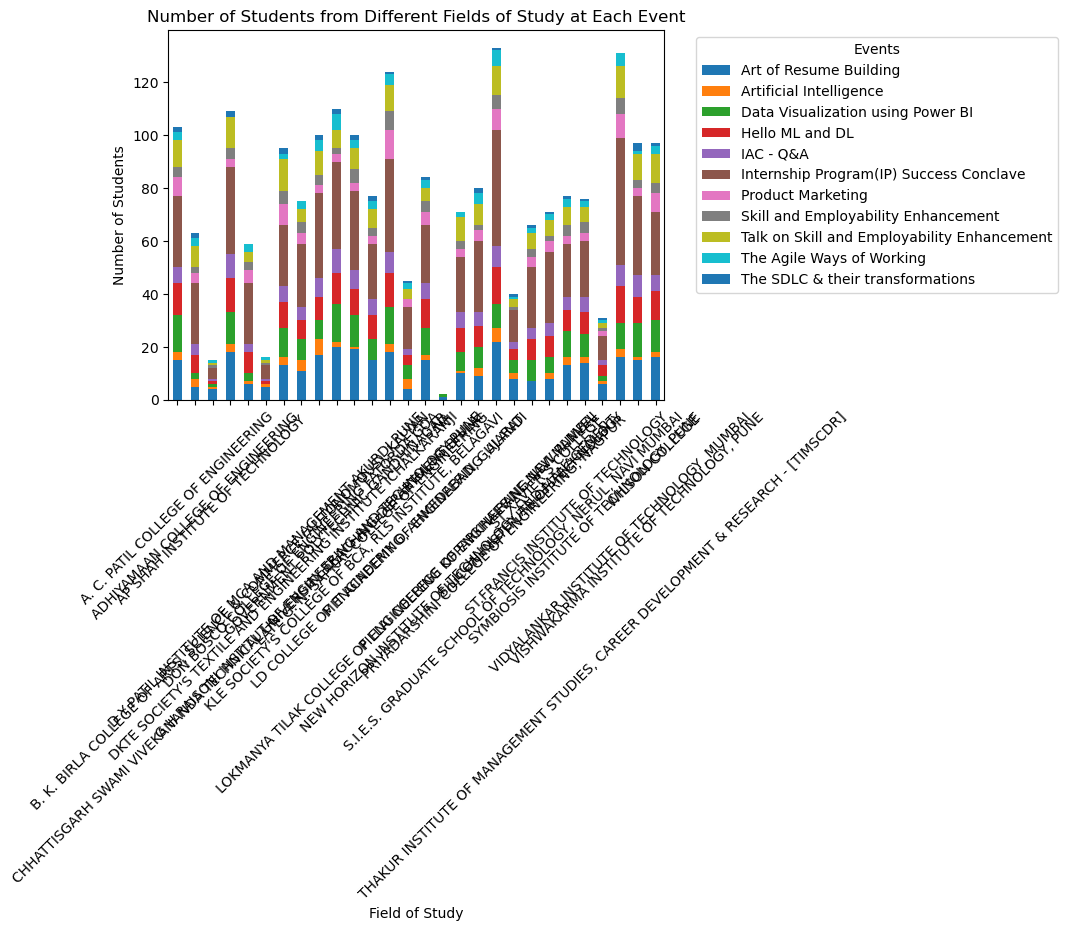

In [22]:
#remove any rows with missing values in the 'Events' and 'College Name' columns:
df.dropna(subset=['Events', 'College Name'], inplace=True)

#create a pivot table to count the number of students from each field of study who attended each event
pivot_table = df.pivot_table(index='College Name', columns='Events', aggfunc='size', fill_value=0)


# Create Bar chart to analyse data
#Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar chart
pivot_table.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Field of Study')
plt.ylabel('Number of Students')
plt.title('Number of Students from Different Fields of Study at Each Event')

# Show the legend
plt.legend(title='Events', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

From the above graph, we can see that "Internship Program Success Conclave" is the major event that tend to attract students.

13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

In [23]:
import scipy.stats as stats

leadership_yes = df[df['Leadership- skills'] == 'Yes']
leadership_no = df[df['Leadership- skills'] == 'No']

mean_gpa_leadership_yes = leadership_yes['CGPA'].mean()
mean_gpa_leadership_no = leadership_no['CGPA'].mean()

mean_salary_leadership_yes = leadership_yes['Expected salary (Lac)'].mean()
mean_salary_leadership_no = leadership_no['Expected salary (Lac)'].mean()

# Perform t-tests for GPA and expected salary
gpa_t_statistic, gpa_p_value = stats.ttest_ind(leadership_yes['CGPA'], leadership_no['CGPA'])
salary_t_statistic, salary_p_value = stats.ttest_ind(leadership_yes['Expected salary (Lac)'], leadership_no['Expected salary (Lac)'])

alpha = 0.05

if gpa_p_value < alpha:
    print("There is a statistically significant difference in GPAs between students with and without leadership positions.")
else:
    print("There is no statistically significant difference in GPAs between students with and without leadership positions.")

if salary_p_value < alpha:
    print("There is a statistically significant difference in expected salaries between students with and without leadership positions.")
else:
    print("There is no statistically significant difference in expected salaries between students with and without leadership positions.")


There is no statistically significant difference in GPAs between students with and without leadership positions.
There is no statistically significant difference in expected salaries between students with and without leadership positions.


14. How many students are graduating by the end of 2024?

In [24]:
graduating_students = df[df['Year of Graduation'] <= 2024]
len(graduating_students)

1347

15. Which promotion channel brings in more student participations for the event?

In [25]:
# Split the 'How did you come to know about this event?' column at "|" and keep only the first part
df['How did you come to know about this event?'] = df['How did you come to know about this event?'].str.split('|').str[0]

df.dropna(subset=['How did you come to know about this event?'], inplace=True)

#Count the number of participants for each promotion channe
promotion_channel_counts = df['How did you come to know about this event?'].value_counts()

#Promotion channel with the highest count
most_effective_channel = promotion_channel_counts.idxmax()
most_effective_channel_count = promotion_channel_counts.max()
print("The most effective channel is",most_effective_channel, 'with',most_effective_channel_count,'number of counts.')

The most effective channel is Whatsapp with 432 number of counts.


16. Find the total number of students who attended the events related to data science? (From all Data Science related courses)

In [26]:
data_science_keywords = ['Artificial Intelligence', 'Data Visualization using Power BI', 'Hello ML and DL', 'IS DATA SCIENCE FOR YOU?']  # Add more keywords as needed
data_science_events = df[df['Events'].str.contains('|'.join(data_science_keywords), case=False, na=False)]
len(data_science_events)

478

17. Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg)

In [27]:
# Define the CGPA and experience thresholds
high_cgpa_threshold = 9.0
high_experience_threshold = 8

# Filter the DataFrame
filtered_students = df[(df['CGPA'] >= high_cgpa_threshold) & (df['Experience with python (Months)'] >= high_experience_threshold)]

average_expected_salary = filtered_students['Expected salary (Lac)'].mean()
average_expected_salary

21.833333333333332

18. How many students know about the event from their colleges? Which of these top 5 colleges?

In [28]:
college_based_students = df[df['How did you come to know about this event?'] == 'College']
top_colleges = college_based_students['College Name'].value_counts().head(5)
print('There are ', len(college_based_students),' students who know about the event from their colleges and the top 5 colleges are as follows:\n\n',top_colleges) 

There are  31  students who know about the event from their colleges and the top 5 colleges are as follows:

 WILSON COLLEGE                                           5
GOVERNMENT POLYTECHNIC GANDHINAGAR                       5
KLE SOCIETY'S COLLEGE OF BCA, RLS INSTITUTE, BELAGAVI    3
VISHWAKARMA INSTITUTE OF TECHNOLOGY, PUNE                3
ST.FRANCIS INSTITUTE OF TECHNOLOGY                       2
Name: College Name, dtype: int64
